In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [42]:
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('Social_Network_Ads.csv')
df = df[['Age', 'EstimatedSalary', 'Purchased']]  # Use only these columns
print(df.head())

   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0


In [5]:
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased'].values.reshape(-1, 1)

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
X_scaled = np.hstack([np.ones((X_scaled.shape[0], 1)), X_scaled])

In [8]:
# sigmoid func
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [9]:
# likelihood
def log_likelihood(X, y, theta):
    z = X.dot(theta)
    h = sigmoid(z)
    return np.sum(y * np.log(h) + (1 - y)*np.log(1 - h))

In [10]:
def gradient_ascent(X, y, alpha=0.1, iterations=1000):
    weights = np.zeros((X.shape[1], 1))
    log_likelihoods = []

    for i in range(iterations):
        z = np.dot(X, weights)
        predictions = sigmoid(z)
        error = y - predictions
        gradient = np.dot(X.T, error)
        weights += alpha * gradient

        ll = log_likelihood(X, y, weights)
        log_likelihoods.append(ll)

    return weights, log_likelihoods


In [11]:
theta, log_likelihoods = gradient_ascent(X_scaled, y, alpha=0.1, iterations=500)
print(f'Final weights : {theta.ravel()}')

Final weights : [0.82993315 8.30482484 2.50680403]


In [12]:
log_likelihoods

[np.float64(-332.09353584002406),
 np.float64(-290.5491445563831),
 np.float64(-255.81087770480292),
 np.float64(-226.20038852987585),
 np.float64(-203.4874279060931),
 np.float64(-200.41081053371076),
 np.float64(-261.798216813232),
 np.float64(-455.28309788642963),
 np.float64(-489.02697096338386),
 np.float64(-423.9540880767395),
 np.float64(-332.7977814463053),
 np.float64(-305.525843302886),
 np.float64(-331.7496149946328),
 np.float64(-374.18342522204074),
 np.float64(-385.6838380950072),
 np.float64(-420.4591665350862),
 np.float64(-375.7608193115807),
 np.float64(-352.06653279382544),
 np.float64(-352.3318775989511),
 np.float64(-350.2874449529355),
 np.float64(-362.57702576881877),
 np.float64(-381.9343709203429),
 np.float64(-374.3668296871035),
 np.float64(-377.3243984878708),
 np.float64(-366.4093289753263),
 np.float64(-360.010461690798),
 np.float64(-361.4429382834229),
 np.float64(-365.7280340434472),
 np.float64(-367.0537268366382),
 np.float64(-374.67145313693237),
 np

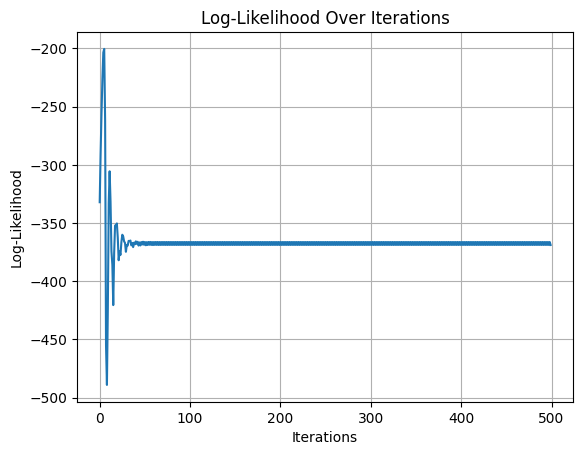

In [13]:
plt.plot(log_likelihoods)
plt.title('Log-Likelihood Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Log-Likelihood')
plt.grid(True)
plt.show()

In [41]:
from sklearn.metrics import accuracy_score

def predict(X, weights):
    return sigmoid(np.dot(X, weights)) >= 0.5

y_pred = predict(X_scaled, theta)
print("Accuracy:", accuracy_score(y, y_pred))


Accuracy: 0.7725
